In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
plt.rcParams["figure.figsize"] = (14,8)
import numpy as np 

directory = directory = "../separation-values/"

ResNet18 = np.load((directory+"ResNet18.npy"))
ResNet34 = np.load((directory+"ResNet34.npy"))
ResNet50 = np.load((directory+"ResNet50.npy"))
BranchedResNet18 = np.load((directory+"BranchedResNet18-CIFAR-10.npy"))
BranchedResNet34 = np.load((directory+"BranchedResNet34-CIFAR-10.npy"))
BranchedResNet50 = np.load((directory+"BranchedResNet50-CIFAR-10.npy"))
GoogLeNet = np.load((directory+"GoogLeNet-CIFAR-10.npy"))
# PNASnet = np.load((directory+"PNASNet.npy"))

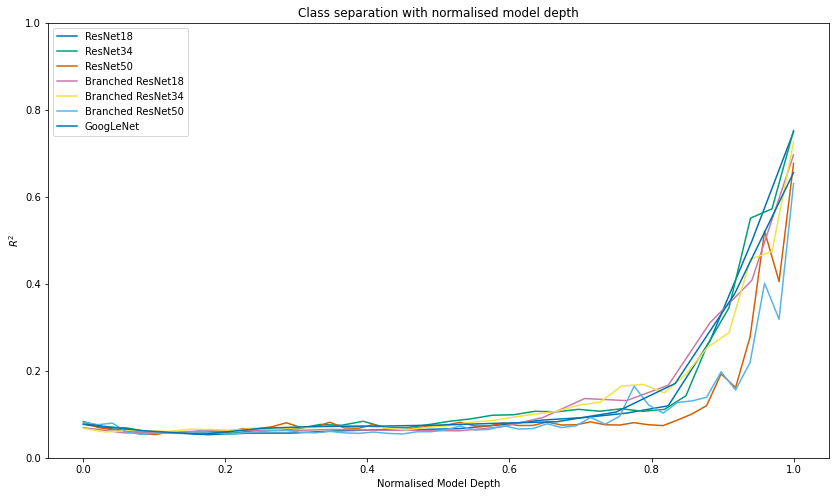

In [2]:
def plot(values,name):
    plt.plot(np.linspace(0,1,values.shape[0]),values,label=name)

plot(ResNet18,'ResNet18')
plot(ResNet34,'ResNet34')
plot(ResNet50,'ResNet50')
plot(BranchedResNet18,'Branched ResNet18')
plot(BranchedResNet34,'Branched ResNet34')
plot(BranchedResNet50,'Branched ResNet50')
plot(GoogLeNet,"GoogLeNet")
# plot(PNASnet,"PNAS-Net")


plt.title('Class separation with normalised model depth')
plt.ylim(0,1)
plt.xlabel("Normalised Model Depth")
plt.ylabel("$R^2$")
plt.legend(loc=2)
plt.savefig('../results/all-models-normalised.pdf', bbox_inches = 'tight')
plt.show()

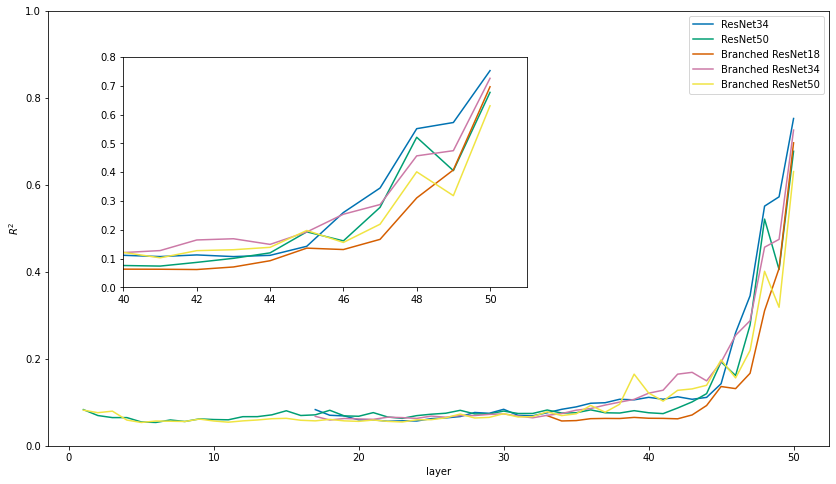

In [3]:
def plot_layer_wise(values,name):
      plt.plot(np.arange(51-values.shape[0],51,),values,label=name)
  
# Create zoom-in plot
fig = plt.figure()
plot_layer_wise(ResNet34,'ResNet34')
plot_layer_wise(ResNet50,'ResNet50')
plot_layer_wise(BranchedResNet18,'Branched ResNet18')
plot_layer_wise(BranchedResNet34,'Branched ResNet34')
plot_layer_wise(BranchedResNet50,'Branched ResNet50')
# plot(GoogLeNet,"GoogLeNet")
# plot(PNASnet,"PNAS-Net")
plt.ylim(0.0, 1.0)
plt.xlabel('layer')
plt.ylabel('$R^2$')
plt.legend()

# Create zoom-out plot
ax_new = fig.add_axes([0.2, 0.4, 0.4, 0.4]) # the position of zoom-out plot compare to the ratio of zoom-in plot 
plot_layer_wise(ResNet34,'ResNet34')
plot_layer_wise(ResNet50,'ResNet50')
plot_layer_wise(BranchedResNet18,'Branched ResNet18')
plot_layer_wise(BranchedResNet34,'Branched ResNet34')
plot_layer_wise(BranchedResNet50,'Branched ResNet50')
# plot(GoogLeNet,"GoogLeNet")
# plot(PNASnet,"PNAS-Net")
plt.xlim(40, 51)
plt.ylim(0, 0.8)
# plt.xlabel('layer')
# plt.ylabel('$R^2$')
# Save figure with nice margin

# plt.savefig('../results/tall-models-layer-wise.pdf', bbox_inches = 'tight')
plt.show()

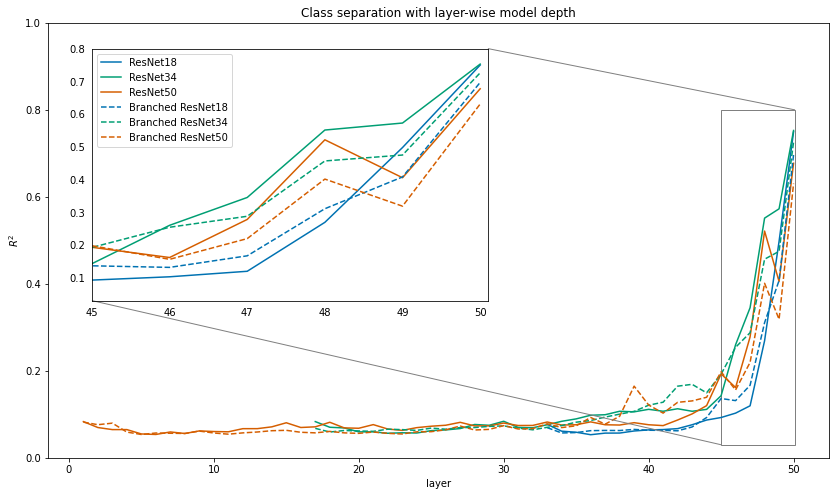

In [4]:
# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax = plt.subplots()

plt.title('Class separation with layer-wise model depth')
ax.plot(np.arange(51-ResNet18.shape[0],51,),ResNet18,label='ResNet18',color='C0')
ax.plot(np.arange(51-ResNet34.shape[0],51,),ResNet34,label='ResNet34',color='C1')
ax.plot(np.arange(51-ResNet50.shape[0],51,),ResNet50,label='ResNet50',color='C2')
ax.plot(np.arange(51-BranchedResNet18.shape[0],51,),BranchedResNet18,'--',label='Branched ResNet18',color='C0')
ax.plot(np.arange(51-BranchedResNet34.shape[0],51,),BranchedResNet34,'--',label='Branched ResNet34',color='C1')
ax.plot(np.arange(51-BranchedResNet50.shape[0],51,),BranchedResNet50,'--',label='Branched ResNet50',color='C2')
plt.ylim(0.0,1.0)
plt.xlabel('layer')
plt.ylabel('$R^2$')



axins = inset_axes(ax, width=5.5, height=3.5, bbox_to_anchor=(0.05,0.35), loc=3, bbox_transform=ax.transAxes)
axins.plot(np.arange(51-ResNet18.shape[0],51,),ResNet18,label='ResNet18',color='C0')
axins.plot(np.arange(51-ResNet34.shape[0],51,),ResNet34,label='ResNet34',color='C1')
axins.plot(np.arange(51-ResNet50.shape[0],51,),ResNet50,label='ResNet50',color='C2')
axins.plot(np.arange(51-BranchedResNet18.shape[0],51,),BranchedResNet18,'--',label='Branched ResNet18',color='C0')
axins.plot(np.arange(51-BranchedResNet34.shape[0],51,),BranchedResNet34,'--',label='Branched ResNet34',color='C1')
axins.plot(np.arange(51-BranchedResNet50.shape[0],51,),BranchedResNet50,'--',label='Branched ResNet50',color='C2')

# sub region of the original image
x1, x2, y1, y2 = 45, 50.1, 0.03, 0.8 
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.tick_params(axis = "x", which = "both", bottom = False, top = False)
axins.tick_params(axis = "y", which = "both", left = False, right = False)


# plt.xticks(visible=False)
# plt.yticks(visible=False)

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
axins.legend()
plt.savefig('../results/branched-resnets-layer-wise.pdf', bbox_inches = 'tight')
plt.draw()
plt.show()

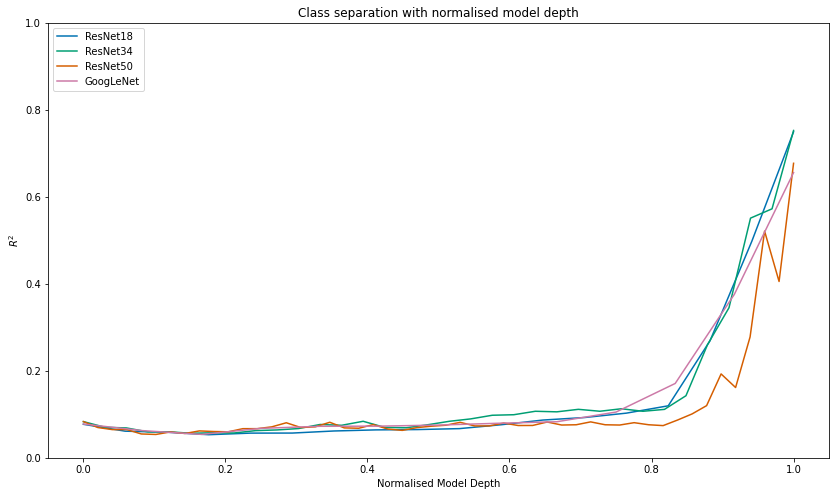

In [5]:
plot(ResNet18,'ResNet18')
plot(ResNet34,'ResNet34')
plot(ResNet50,'ResNet50')
plot(GoogLeNet,"GoogLeNet")
# plot(PNASnet,"PNAS-Net")


plt.title('Class separation with normalised model depth')
plt.ylim(0,1)
plt.xlabel("Normalised Model Depth")
plt.ylabel("$R^2$")
plt.legend(loc=2)
plt.savefig('../results/all-models-normalised.pdf', bbox_inches = 'tight')
plt.show()

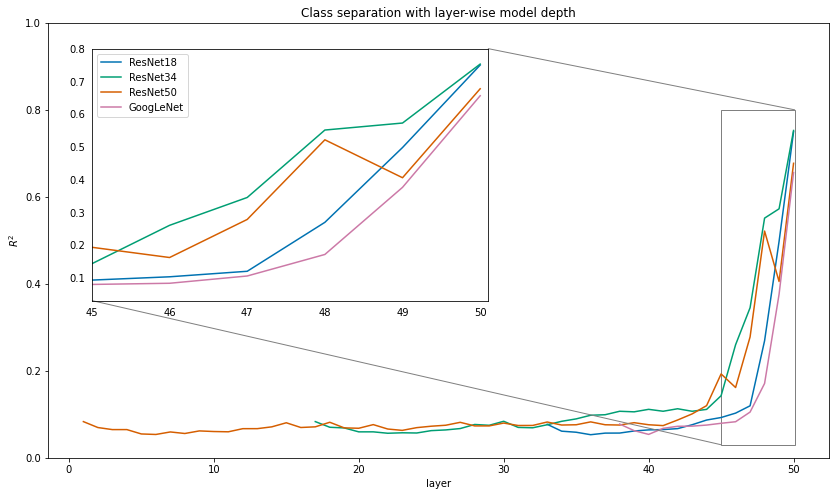

In [6]:
# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax = plt.subplots()

plt.title('Class separation with layer-wise model depth')
ax.plot(np.arange(51-ResNet18.shape[0],51,),ResNet18,label='ResNet18',color='C0')
ax.plot(np.arange(51-ResNet34.shape[0],51,),ResNet34,label='ResNet34',color='C1')
ax.plot(np.arange(51-ResNet50.shape[0],51,),ResNet50,label='ResNet50',color='C2')
ax.plot(np.arange(51-GoogLeNet.shape[0],51,),GoogLeNet,label='GoogLeNet',color='C3')
plt.ylim(0.0,1.0)
plt.xlabel('layer')
plt.ylabel('$R^2$')



axins = inset_axes(ax, width=5.5, height=3.5, bbox_to_anchor=(0.05,0.35), loc=3, bbox_transform=ax.transAxes)
axins.plot(np.arange(51-ResNet18.shape[0],51,),ResNet18,label='ResNet18',color='C0')
axins.plot(np.arange(51-ResNet34.shape[0],51,),ResNet34,label='ResNet34',color='C1')
axins.plot(np.arange(51-ResNet50.shape[0],51,),ResNet50,label='ResNet50',color='C2')
axins.plot(np.arange(51-GoogLeNet.shape[0],51,),GoogLeNet,label='GoogLeNet',color='C3')

# sub region of the original image
x1, x2, y1, y2 = 45, 50.1, 0.03, 0.8 
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.tick_params(axis = "x", which = "both", bottom = False, top = False)
axins.tick_params(axis = "y", which = "both", left = False, right = False)


# plt.xticks(visible=False)
# plt.yticks(visible=False)

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
axins.legend()
plt.savefig('../results/all-models-layer-wise.pdf', bbox_inches = 'tight')
plt.draw()
plt.show()